In [118]:
import pandas as pd

In [119]:
df=pd.read_csv("C:\\Users\\C_v\\Desktop\\dataset_37_diabetes.csv")

In [120]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [121]:
from sklearn.preprocessing import Imputer


In [122]:

imp=Imputer(missing_values=0, strategy="mean" )


C:\Users\C_v\Anaconda5\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [123]:
imp.fit(df[["insu"]])


Imputer(axis=0, copy=True, missing_values=0, strategy='mean', verbose=0)

In [124]:
df["insu"]=imp.transform(df[["insu"]]).ravel()


In [125]:

imp1=Imputer(missing_values=0, strategy="mean" )


C:\Users\C_v\Anaconda5\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [126]:
imp1.fit(df[["skin"]])


Imputer(axis=0, copy=True, missing_values=0, strategy='mean', verbose=0)

In [127]:
df["skin"]=imp1.transform(df[["skin"]]).ravel()


In [128]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35.00000,155.548223,33.6,0.627,50,tested_positive
1,1,85,66,29.00000,155.548223,26.6,0.351,31,tested_negative
2,8,183,64,29.15342,155.548223,23.3,0.672,32,tested_positive
3,1,89,66,23.00000,94.000000,28.1,0.167,21,tested_negative
4,0,137,40,35.00000,168.000000,43.1,2.288,33,tested_positive


In [129]:
df.skin=df.skin.astype(int)

In [130]:
df.insu=df.insu.astype(int)

In [131]:
X=df[['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']]

In [132]:
y=df['class']

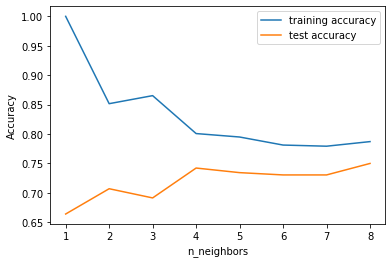

In [133]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 9)
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')


In [134]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.75


In [135]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.77
Accuracy of K-NN classifier on test set: 0.75
